In [5]:
%matplotlib inline

seed_value = 100
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

# Data uploading

In [16]:
AIRPORT_ICAO = "ESSA"

RUNWAYS = ['08', '01L', '01R', '26', '19R', '19L']
CLUSTERS = [1,2,3,4,5,6]

DATA_DIR = os.path.join("..", "..")
DATA_DIR = os.path.join(DATA_DIR, "..")
DATA_DIR = os.path.join(DATA_DIR, "data")
DATA_DIR = os.path.join(DATA_DIR, "Regression")

# WIF
rwy_metrics_WIF_horizontal_PIs_by_hour_df_list = [] # list of lists

# TIF
rwy_metrics_TIF_horizontal_PIs_by_hour_df_list = [] # list of lists

i = 0
for runway in RUNWAYS:
    rwy_metrics_WIF_horizontal_PIs_by_hour_df_list.append([])
    rwy_metrics_TIF_horizontal_PIs_by_hour_df_list.append([])

    for cluster in CLUSTERS:
        filename = AIRPORT_ICAO + "_metrics_WIF_horizontal_PIs_by_hour_rwy" + runway + "_cluster" + str(cluster) + ".csv"
        full_filename = os.path.join(DATA_DIR, filename)
        temp_df = pd.read_csv(full_filename, sep=' ')
        rwy_metrics_WIF_horizontal_PIs_by_hour_df_list[i].append(temp_df)

        filename = AIRPORT_ICAO + "_metrics_TIF_horizontal_PIs_by_hour_rwy" + runway + "_cluster" + str(cluster) + ".csv"
        full_filename = os.path.join(DATA_DIR, filename)
        temp_df = pd.read_csv(full_filename, sep=' ')
        rwy_metrics_TIF_horizontal_PIs_by_hour_df_list[i].append(temp_df)

    i = i+1

# Average Additional Distance

## Medians of Average Additional Distance in TMA vs TIF

C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.appen

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.139
Method:                 Least Squares   F-statistic:                   0.02443
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.880
Time:                        13:55:28   Log-Likelihood:                -24.241
No. Observations:                   9   AIC:                             52.48
Df Residuals:                       7   BIC:                             52.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2059      2.946     -0.070      0.9

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     8.882
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0246
Time:                        13:55:29   Log-Likelihood:                -16.846
No. Observations:                   8   AIC:                             37.69
Df Residuals:                       6   BIC:                             37.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3062      1.788     -1.290      0.2

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     21.53
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00237
Time:                        13:55:29   Log-Likelihood:                -30.181
No. Observations:                   9   AIC:                             64.36
Df Residuals:                       7   BIC:                             64.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.1138      5.701      4.054      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.124
Method:                 Least Squares   F-statistic:                    0.2298
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.649
Time:                        13:55:29   Log-Likelihood:                -22.720
No. Observations:                   8   AIC:                             49.44
Df Residuals:                       6   BIC:                             49.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5805      4.397      2.179      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     31.97
Date:                Thu, 26 May 2022   Prob (F-statistic):           0.000771
Time:                        13:55:29   Log-Likelihood:                -12.978
No. Observations:                   9   AIC:                             29.96
Df Residuals:                       7   BIC:                             30.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2887      0.843      2.715      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.155
Method:                 Least Squares   F-statistic:                   0.06192
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.812
Time:                        13:55:30   Log-Likelihood:                -22.948
No. Observations:                   8   AIC:                             49.90
Df Residuals:                       6   BIC:                             50.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7293      4.129      2.356      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     13.51
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00626
Time:                        13:55:30   Log-Likelihood:                -27.167
No. Observations:                  10   AIC:                             58.33
Df Residuals:                       8   BIC:                             58.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5198      2.796     -1.259      0.2

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     5.920
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0410
Time:                        13:55:30   Log-Likelihood:                -34.653
No. Observations:                  10   AIC:                             73.31
Df Residuals:                       8   BIC:                             73.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.3817      5.911     -4.801      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     90.44
Date:                Thu, 26 May 2022   Prob (F-statistic):           1.23e-05
Time:                        13:55:31   Log-Likelihood:                -17.869
No. Observations:                  10   AIC:                             39.74
Df Residuals:                       8   BIC:                             40.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3121      1.103     -7.533      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     18.66
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00255
Time:                        13:55:31   Log-Likelihood:                -7.6966
No. Observations:                  10   AIC:                             19.39
Df Residuals:                       8   BIC:                             20.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0101      0.399      2.531      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.138
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.317
Time:                        13:55:31   Log-Likelihood:                -11.937
No. Observations:                  10   AIC:                             27.87
Df Residuals:                       8   BIC:                             28.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0149      0.610     27.906      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     24.84
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00107
Time:                        13:55:31   Log-Likelihood:                -9.5626
No. Observations:                  10   AIC:                             23.13
Df Residuals:                       8   BIC:                             23.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1554      0.481     14.880      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     83.22
Date:                Thu, 26 May 2022   Prob (F-statistic):           1.68e-05
Time:                        13:55:32   Log-Likelihood:                -18.386
No. Observations:                  10   AIC:                             40.77
Df Residuals:                       8   BIC:                             41.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7625      1.162     -3.238      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     14.92
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00479
Time:                        13:55:32   Log-Likelihood:                -11.712
No. Observations:                  10   AIC:                             27.42
Df Residuals:                       8   BIC:                             28.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0703      0.596      1.795      0.1

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     55.88
Date:                Thu, 26 May 2022   Prob (F-statistic):           7.09e-05
Time:                        13:55:32   Log-Likelihood:                -22.987
No. Observations:                  10   AIC:                             49.97
Df Residuals:                       8   BIC:                             50.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7408      1.841     -3.119      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     19.86
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00212
Time:                        13:55:33   Log-Likelihood:                -9.9589
No. Observations:                  10   AIC:                             23.92
Df Residuals:                       8   BIC:                             24.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1905      0.500    -10.375      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     16.74
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00348
Time:                        13:55:33   Log-Likelihood:                -14.707
No. Observations:                  10   AIC:                             33.41
Df Residuals:                       8   BIC:                             34.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6563      0.804      8.276      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     141.0
Date:                Thu, 26 May 2022   Prob (F-statistic):           2.32e-06
Time:                        13:55:33   Log-Likelihood:                -14.633
No. Observations:                  10   AIC:                             33.27
Df Residuals:                       8   BIC:                             33.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.4967      0.798    -15.652      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     7.366
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0265
Time:                        13:55:34   Log-Likelihood:                -27.032
No. Observations:                  10   AIC:                             58.06
Df Residuals:                       8   BIC:                             58.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.7819      2.759     13.332      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     62.36
Date:                Thu, 26 May 2022   Prob (F-statistic):           4.79e-05
Time:                        13:55:34   Log-Likelihood:                -10.786
No. Observations:                  10   AIC:                             25.57
Df Residuals:                       8   BIC:                             26.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.4245      0.543    -59.668      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     60.63
Date:                Thu, 26 May 2022   Prob (F-statistic):           5.30e-05
Time:                        13:55:34   Log-Likelihood:                -17.978
No. Observations:                  10   AIC:                             39.96
Df Residuals:                       8   BIC:                             40.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3656      1.116     16.462      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     29.41
Date:                Thu, 26 May 2022   Prob (F-statistic):           0.000629
Time:                        13:55:34   Log-Likelihood:                -23.462
No. Observations:                  10   AIC:                             50.92
Df Residuals:                       8   BIC:                             51.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.0729      1.930    -16.614      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     31.25
Date:                Thu, 26 May 2022   Prob (F-statistic):           0.000516
Time:                        13:55:35   Log-Likelihood:                -22.015
No. Observations:                  10   AIC:                             48.03
Df Residuals:                       8   BIC:                             48.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1823      1.670      6.695      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     22.64
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00143
Time:                        13:55:35   Log-Likelihood:                -19.919
No. Observations:                  10   AIC:                             43.84
Df Residuals:                       8   BIC:                             44.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.0531      1.355    -15.543      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                    0.4969
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.501
Time:                        13:55:35   Log-Likelihood:                -21.469
No. Observations:                  10   AIC:                             46.94
Df Residuals:                       8   BIC:                             47.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0909      1.582     -0.690      0.5

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     126.9
Date:                Thu, 26 May 2022   Prob (F-statistic):           3.47e-06
Time:                        13:55:36   Log-Likelihood:                -18.085
No. Observations:                  10   AIC:                             40.17
Df Residuals:                       8   BIC:                             40.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2403      1.128     -5.534      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     66.16
Date:                Thu, 26 May 2022   Prob (F-statistic):           3.87e-05
Time:                        13:55:36   Log-Likelihood:                -9.6606
No. Observations:                  10   AIC:                             23.32
Df Residuals:                       8   BIC:                             23.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3191      0.486      0.657      0.5

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     87.05
Date:                Thu, 26 May 2022   Prob (F-statistic):           1.42e-05
Time:                        13:55:36   Log-Likelihood:                -8.7791
No. Observations:                  10   AIC:                             21.56
Df Residuals:                       8   BIC:                             22.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2579      0.445     -5.078      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     272.0
Date:                Thu, 26 May 2022   Prob (F-statistic):           1.84e-07
Time:                        13:55:36   Log-Likelihood:                -9.6378
No. Observations:                  10   AIC:                             23.28
Df Residuals:                       8   BIC:                             23.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8129      0.484     -9.934      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     70.62
Date:                Thu, 26 May 2022   Prob (F-statistic):           3.06e-05
Time:                        13:55:37   Log-Likelihood:                -19.369
No. Observations:                  10   AIC:                             42.74
Df Residuals:                       8   BIC:                             43.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1169      1.282     -0.871      0.4

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     76.73
Date:                Thu, 26 May 2022   Prob (F-statistic):           2.26e-05
Time:                        13:55:37   Log-Likelihood:                -13.878
No. Observations:                  10   AIC:                             31.76
Df Residuals:                       8   BIC:                             32.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8445      0.740     -5.193      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     28.97
Date:                Thu, 26 May 2022   Prob (F-statistic):           0.000660
Time:                        13:55:37   Log-Likelihood:                -16.910
No. Observations:                  10   AIC:                             37.82
Df Residuals:                       8   BIC:                             38.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.6119      1.003    -12.579      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     40.89
Date:                Thu, 26 May 2022   Prob (F-statistic):           0.000210
Time:                        13:55:38   Log-Likelihood:                -14.169
No. Observations:                  10   AIC:                             32.34
Df Residuals:                       8   BIC:                             32.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1442      0.762     -1.501      0.1

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     67.35
Date:                Thu, 26 May 2022   Prob (F-statistic):           3.63e-05
Time:                        13:55:38   Log-Likelihood:                -16.794
No. Observations:                  10   AIC:                             37.59
Df Residuals:                       8   BIC:                             38.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.8119      0.991     17.973      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\1865278128.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     21.17
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00175
Time:                        13:55:38   Log-Likelihood:                -15.306
No. Observations:                  10   AIC:                             34.61
Df Residuals:                       8   BIC:                             35.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.5208      0.854    -19.345      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


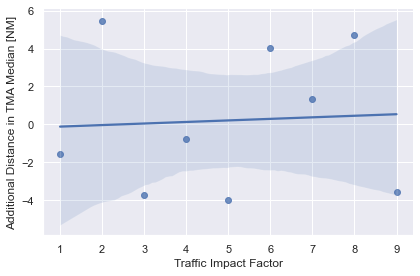

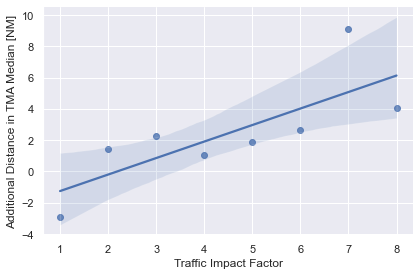

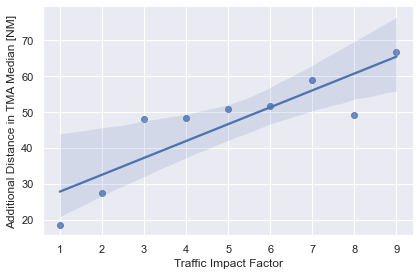

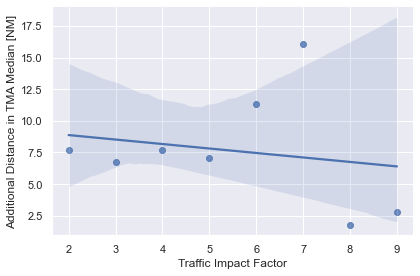

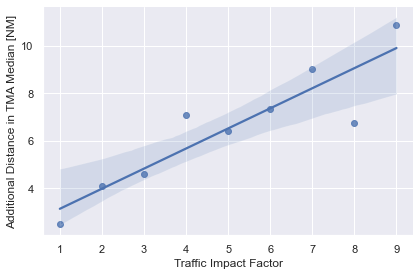

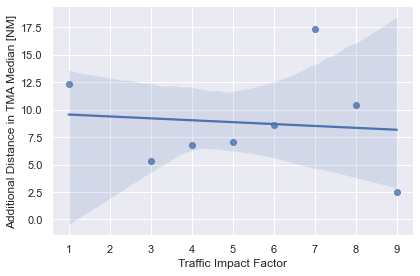

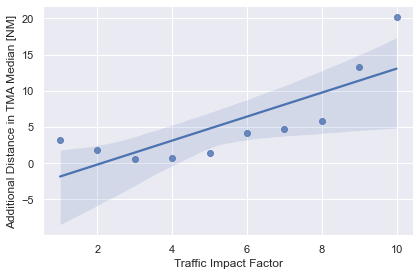

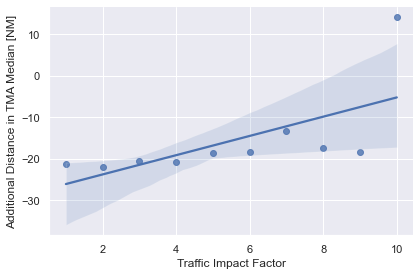

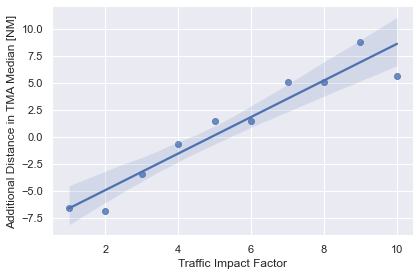

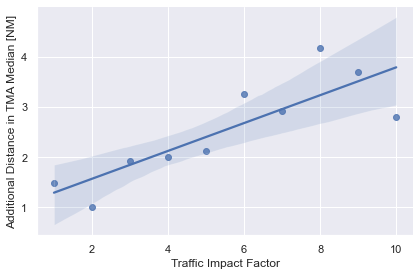

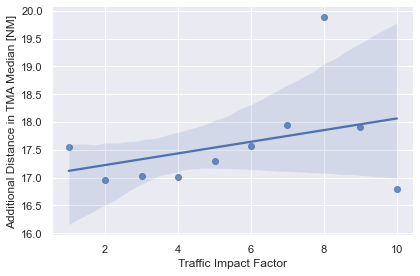

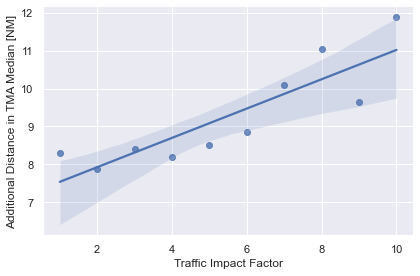

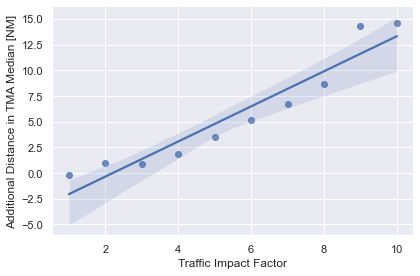

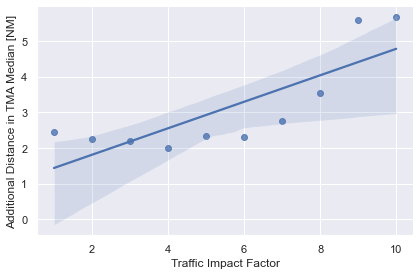

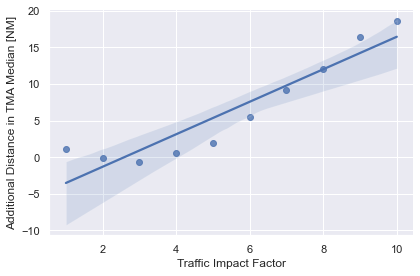

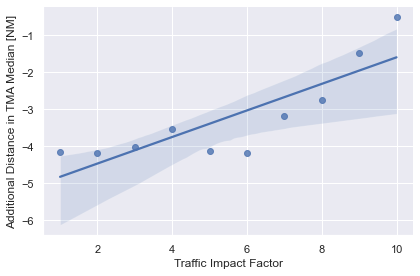

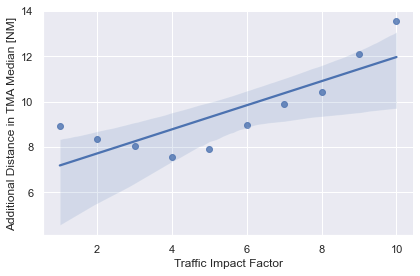

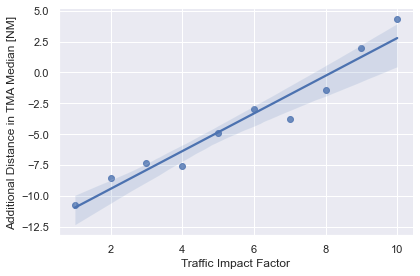

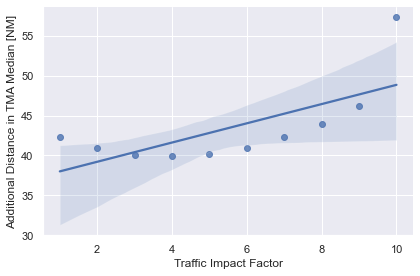

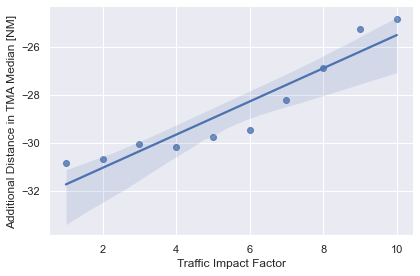

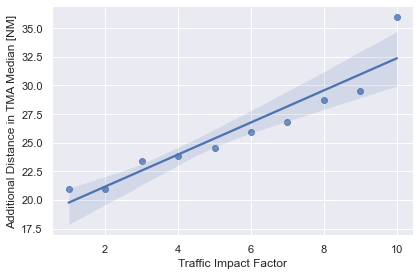

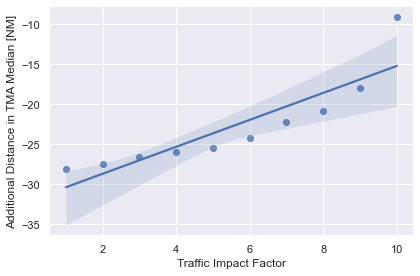

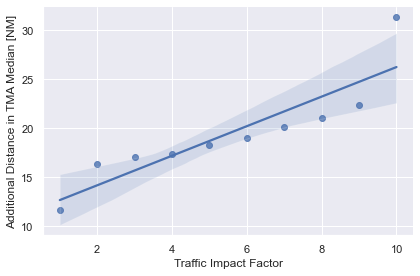

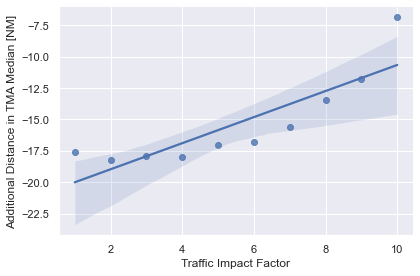

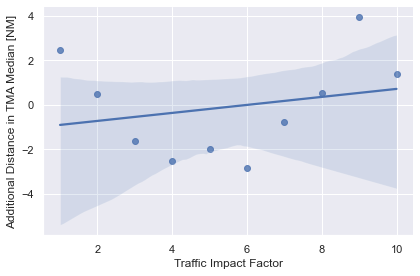

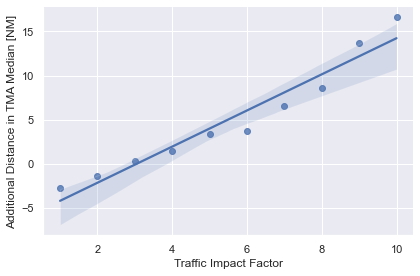

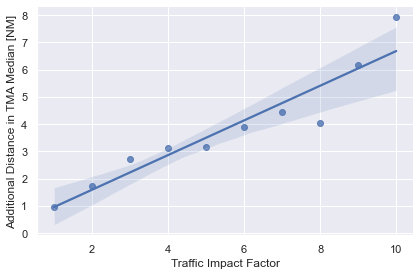

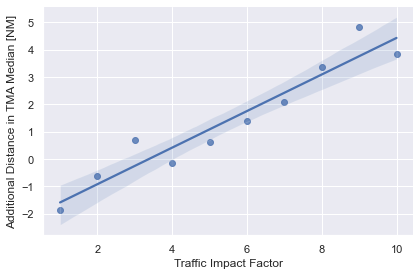

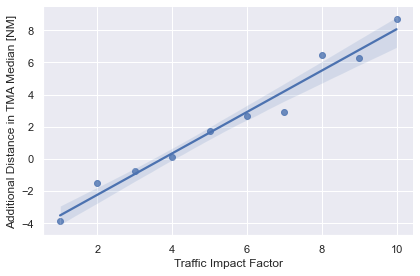

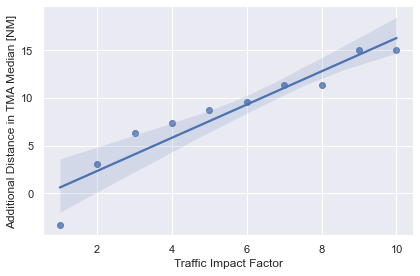

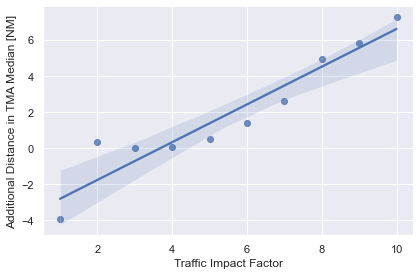

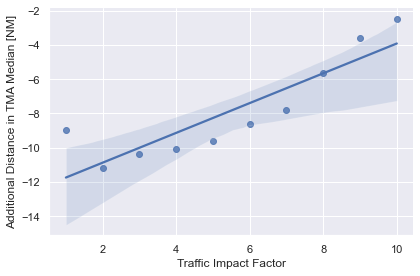

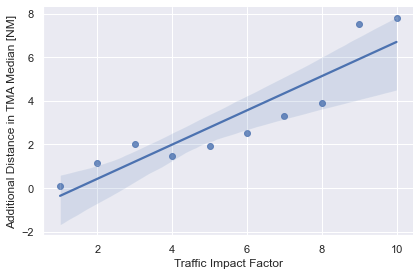

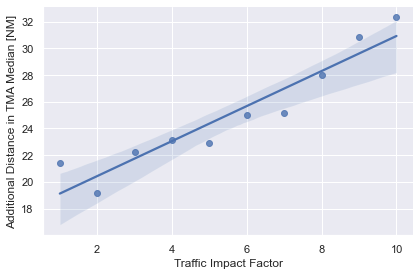

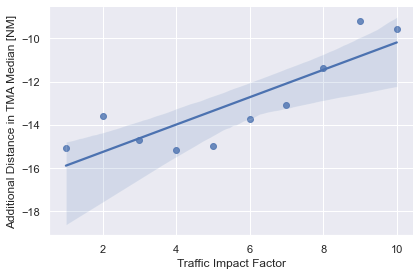

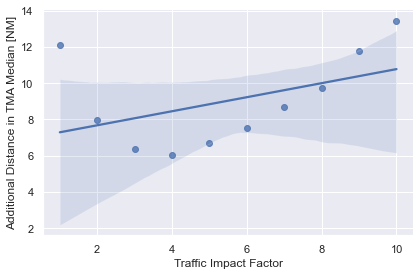

In [19]:
RUNWAYS = ['08', '01L', '01R', '26', '19R', '19L']
CLUSTERS = [1,2,3,4,5,6]

i = -1
for runway in RUNWAYS:
    i = i+1
    for cluster in CLUSTERS:
        df = rwy_metrics_TIF_horizontal_PIs_by_hour_df_list[i][cluster-1].copy()
        df = df[df['numberOfFlights']>0]
        #print(df.head())
        #p1 = df["distanceChangePercentMean"].quantile(0.05)
        #p2 = df["distanceChangePercentMean"].quantile(0.95)
        #df = df.loc[(df['distanceChangePercentMean'] > p1) & (df['distanceChangePercentMean'] < p2) ]

        df.set_index(['TIF'], inplace=True)
        df.sort_index(inplace=True)

        median_df = pd.DataFrame(columns=['TIF', 'addDistanceMedian'])

        for idx, group in df.groupby(level='TIF'):
    
            #idx_df = group['distanceChangePercentMean']
            idx_df = group['additionalDistanceMean']
    
            idx_median = np.median(idx_df)
            median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)

        median_df['TIF'] = median_df['TIF'].astype(np.float)
        median_df['addDistanceMedian'] = median_df['addDistanceMedian'].astype(np.float)
        
        sns.set(rc={'figure.figsize':(1,1)})

        sns.lmplot(x='TIF',y='addDistanceMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
        plt.xlabel('Traffic Impact Factor')
        plt.ylabel('Additional Distance in TMA Median [NM]')
        #plt.ylabel('Additional Distance in TMA Median [%]')
        
        fig_name = "Figures\AddDistanceVsTIF\AddDistanceVsTIF_runway" + runway + "_cluster" + str(cluster) + ".png"
        #fig_name = "Figures\AddDistancePercentVsTIF\AddDistancePercentVsTIF_runway" + runway + "_cluster" + str(cluster) + ".png"
        plt.savefig(fig_name)

        #statsmodel:
        X_df = median_df[['TIF']]
        y_df = median_df[['addDistanceMedian']]

        X2 = sm.add_constant(X_df.values)
        est = sm.OLS(y_df, X2)
        est2 = est.fit()
        print(est2.summary())
        # with outliers - ESGG: 0.84, ESSA: 0.93
        # without outliers - ESGG: 0.86, ESSA: 0.93

## Medians of Average Additional Distance in TMA vs WIF

C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.appen

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     17.63
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00850
Time:                        05:57:42   Log-Likelihood:                -6.6077
No. Observations:                   7   AIC:                             17.22
Df Residuals:                       5   BIC:                             17.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0434      0.622     -0.070      0.9

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.250
Method:                 Least Squares   F-statistic:                  0.001334
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.973
Time:                        05:57:42   Log-Likelihood:                -11.269
No. Observations:                   6   AIC:                             26.54
Df Residuals:                       4   BIC:                             26.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9516      1.805      1.081      0.3

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                 -0.162
Method:                 Least Squares   F-statistic:                    0.3037
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.611
Time:                        05:57:42   Log-Likelihood:                -16.435
No. Observations:                   6   AIC:                             36.87
Df Residuals:                       4   BIC:                             36.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.0105      4.269     10.309      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     27.00
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00653
Time:                        05:57:43   Log-Likelihood:                -5.4153
No. Observations:                   6   AIC:                             14.83
Df Residuals:                       4   BIC:                             14.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5333      0.680     15.483      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.8523
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.398
Time:                        05:57:43   Log-Likelihood:                -16.094
No. Observations:                   7   AIC:                             36.19
Df Residuals:                       5   BIC:                             36.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5137      2.411      1.457      0.2

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.220
Method:                 Least Squares   F-statistic:                   0.09992
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.768
Time:                        05:57:43   Log-Likelihood:                -14.206
No. Observations:                   6   AIC:                             32.41
Df Residuals:                       4   BIC:                             31.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0413      2.944      3.071      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.8729
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.381
Time:                        05:57:44   Log-Likelihood:                -15.677
No. Observations:                   9   AIC:                             35.35
Df Residuals:                       7   BIC:                             35.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8400      1.138      0.738      0.4

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     3.038
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.125
Time:                        05:57:44   Log-Likelihood:                -15.714
No. Observations:                   9   AIC:                             35.43
Df Residuals:                       7   BIC:                             35.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.7909      1.142    -19.074      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     5.009
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0556
Time:                        05:57:44   Log-Likelihood:                -19.184
No. Observations:                  10   AIC:                             42.37
Df Residuals:                       8   BIC:                             42.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7028      1.258     -2.148      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     2.582
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.159
Time:                        05:57:44   Log-Likelihood:                -18.095
No. Observations:                   8   AIC:                             40.19
Df Residuals:                       6   BIC:                             40.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3167      2.090      0.152      0.8

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     2.208
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.188
Time:                        05:57:45   Log-Likelihood:                -18.934
No. Observations:                   8   AIC:                             41.87
Df Residuals:                       6   BIC:                             42.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0952      2.321      6.503      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     6.406
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0392
Time:                        05:57:45   Log-Likelihood:                -18.591
No. Observations:                   9   AIC:                             41.18
Df Residuals:                       7   BIC:                             41.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3288      1.573      4.024      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                 -0.076
Method:                 Least Squares   F-statistic:                    0.3653
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.562
Time:                        05:57:45   Log-Likelihood:                -29.054
No. Observations:                  10   AIC:                             62.11
Df Residuals:                       8   BIC:                             62.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3097      3.377      0.684      0.5

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     3.840
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0857
Time:                        05:57:46   Log-Likelihood:                -20.709
No. Observations:                  10   AIC:                             45.42
Df Residuals:                       8   BIC:                             46.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0734      1.466      0.732      0.4

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     1.551
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.248
Time:                        05:57:46   Log-Likelihood:                -35.887
No. Observations:                  10   AIC:                             75.77
Df Residuals:                       8   BIC:                             76.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0490      6.688     -0.157      0.8

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     7.035
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0328
Time:                        05:57:46   Log-Likelihood:                -7.4157
No. Observations:                   9   AIC:                             18.83
Df Residuals:                       7   BIC:                             19.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6059      0.454    -10.137      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     5.278
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0552
Time:                        05:57:47   Log-Likelihood:                -20.907
No. Observations:                   9   AIC:                             45.81
Df Residuals:                       7   BIC:                             46.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6412      2.034      2.773      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     4.099
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0775
Time:                        05:57:47   Log-Likelihood:                -24.239
No. Observations:                  10   AIC:                             52.48
Df Residuals:                       8   BIC:                             53.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.8961      2.086     -3.785      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     8.241
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0240
Time:                        05:57:47   Log-Likelihood:                -16.233
No. Observations:                   9   AIC:                             36.47
Df Residuals:                       7   BIC:                             36.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.3002      1.210     31.647      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.134
Method:                 Least Squares   F-statistic:                   0.05565
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.820
Time:                        05:57:48   Log-Likelihood:                -12.682
No. Observations:                   9   AIC:                             29.36
Df Residuals:                       7   BIC:                             29.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.8100      0.816    -36.546      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.8742
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.377
Time:                        05:57:48   Log-Likelihood:                -16.164
No. Observations:                  10   AIC:                             36.33
Df Residuals:                       8   BIC:                             36.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.3069      0.930     26.123      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     3.623
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0987
Time:                        05:57:48   Log-Likelihood:                -18.767
No. Observations:                   9   AIC:                             41.53
Df Residuals:                       7   BIC:                             41.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.6088      1.604    -15.344      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     22.57
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00316
Time:                        05:57:49   Log-Likelihood:                -1.8240
No. Observations:                   8   AIC:                             7.648
Df Residuals:                       6   BIC:                             7.807
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8568      0.273     61.642      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.097
Method:                 Least Squares   F-statistic:                    0.2033
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.664
Time:                        05:57:49   Log-Likelihood:                -13.211
No. Observations:                  10   AIC:                             30.42
Df Residuals:                       8   BIC:                             31.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.3346      0.693    -25.029      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.105
Method:                 Least Squares   F-statistic:                    0.1424
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.716
Time:                        05:57:49   Log-Likelihood:                -31.734
No. Observations:                  10   AIC:                             67.47
Df Residuals:                       8   BIC:                             68.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4991      4.415     -0.340      0.7

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     3.619
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0936
Time:                        05:57:49   Log-Likelihood:                -29.385
No. Observations:                  10   AIC:                             62.77
Df Residuals:                       8   BIC:                             63.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6239      3.491     -0.752      0.4

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     19.36
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00229
Time:                        05:57:50   Log-Likelihood:                -17.057
No. Observations:                  10   AIC:                             38.11
Df Residuals:                       8   BIC:                             38.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3321      1.017      0.326      0.7

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     14.16
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00552
Time:                        05:57:50   Log-Likelihood:                -28.858
No. Observations:                  10   AIC:                             61.72
Df Residuals:                       8   BIC:                             62.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3915      3.311     -1.930      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     11.37
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00976
Time:                        05:57:50   Log-Likelihood:                -18.817
No. Observations:                  10   AIC:                             41.63
Df Residuals:                       8   BIC:                             42.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8871      1.213     -1.556      0.1

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     6.428
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0350
Time:                        05:57:51   Log-Likelihood:                -32.134
No. Observations:                  10   AIC:                             68.27
Df Residuals:                       8   BIC:                             68.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5113      4.595      0.111      0.9

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.113
Method:                 Least Squares   F-statistic:                    0.1863
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.679
Time:                        05:57:51   Log-Likelihood:                -19.322
No. Observations:                   9   AIC:                             42.64
Df Residuals:                       7   BIC:                             43.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2015      1.706      0.704      0.5

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.5755
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.473
Time:                        05:57:51   Log-Likelihood:                -12.096
No. Observations:                   9   AIC:                             28.19
Df Residuals:                       7   BIC:                             28.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0462      0.764    -11.836      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     13.56
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0103
Time:                        05:57:52   Log-Likelihood:                -5.7730
No. Observations:                   8   AIC:                             15.55
Df Residuals:                       6   BIC:                             15.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6261      0.448      1.398      0.2

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     4.084
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0830
Time:                        05:57:52   Log-Likelihood:                -16.596
No. Observations:                   9   AIC:                             37.19
Df Residuals:                       7   BIC:                             37.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.9604      1.260     19.809      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_10996\3940365219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     1.749
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.228
Time:                        05:57:52   Log-Likelihood:                -25.030
No. Observations:                   9   AIC:                             54.06
Df Residuals:                       7   BIC:                             54.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.3568      3.216     -5.085      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.121
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.325
Time:                        05:57:52   Log-Likelihood:                -23.513
No. Observations:                   9   AIC:                             51.03
Df Residuals:                       7   BIC:                             51.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8254      2.717      3.248      0.0

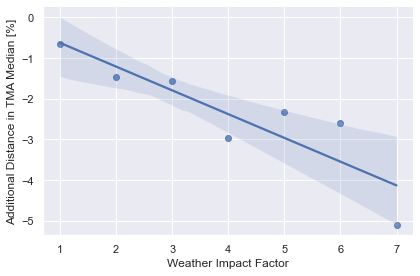

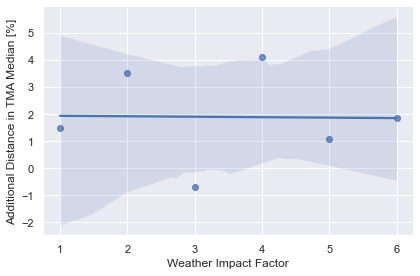

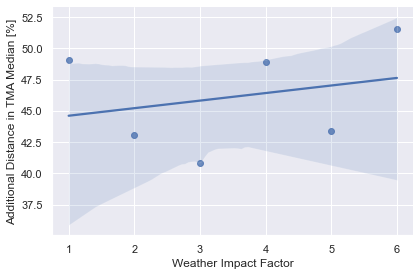

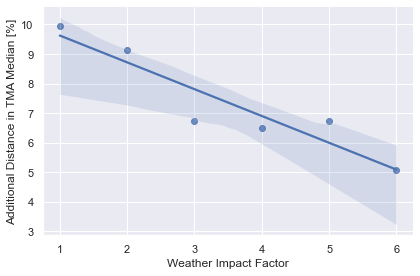

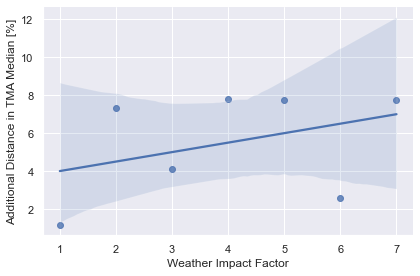

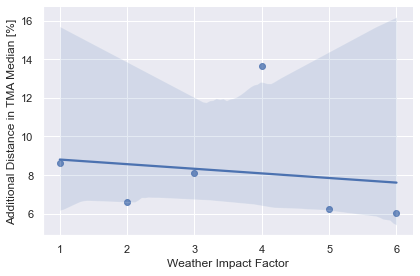

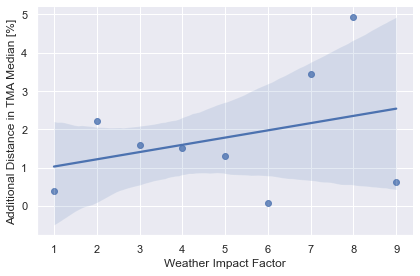

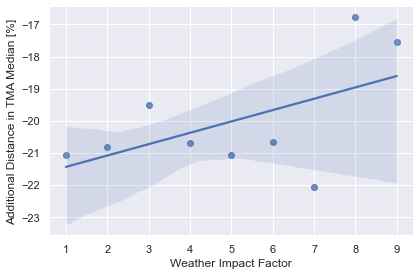

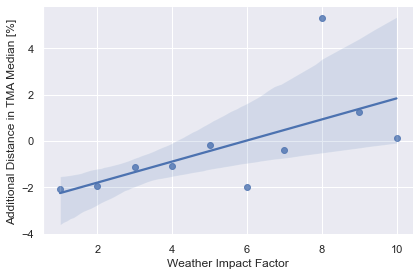

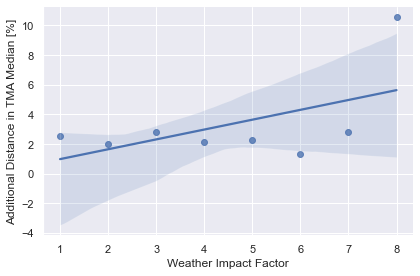

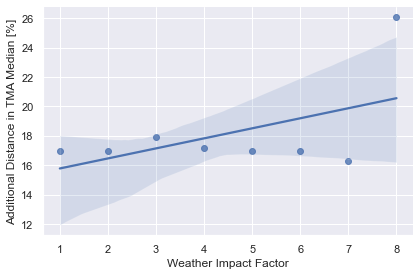

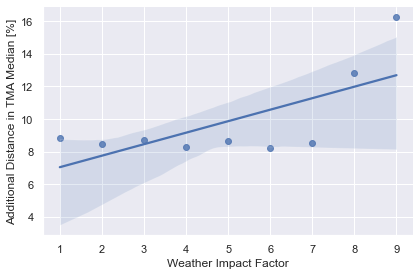

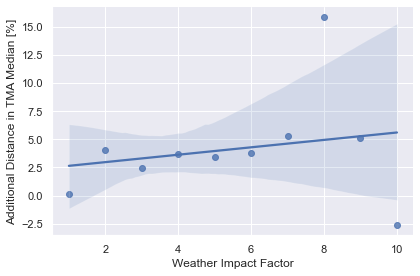

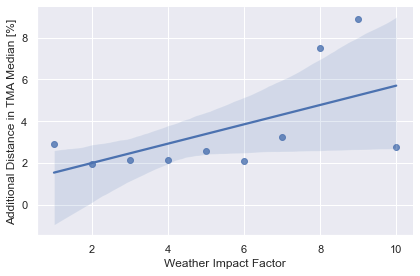

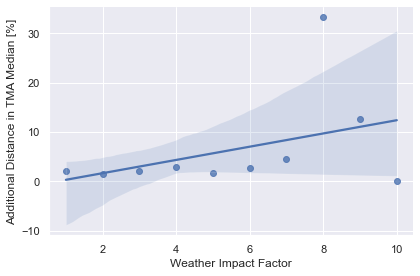

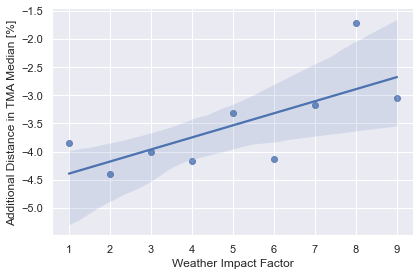

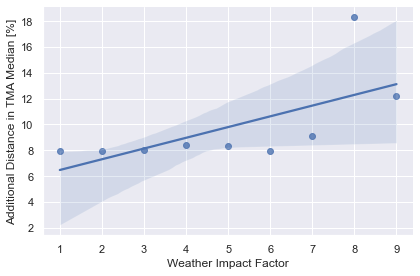

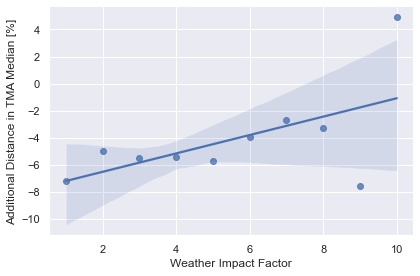

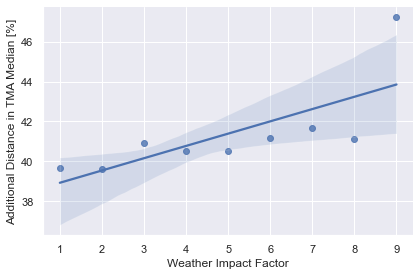

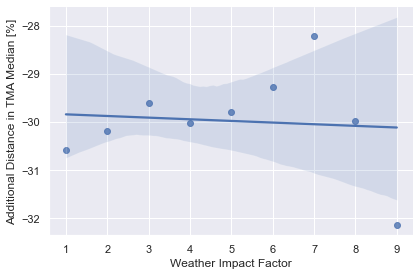

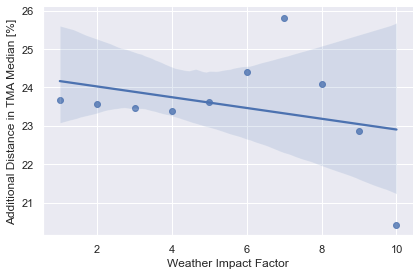

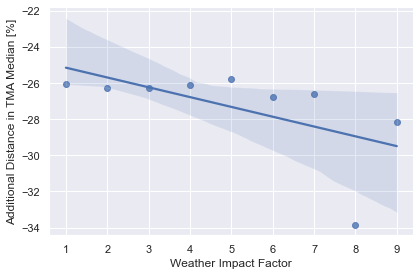

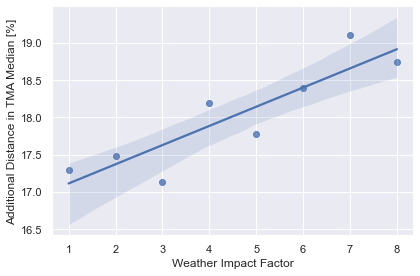

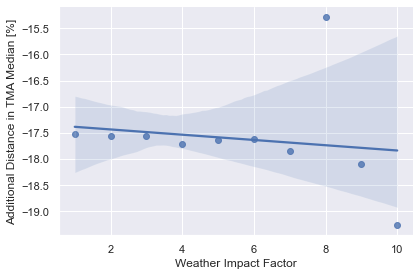

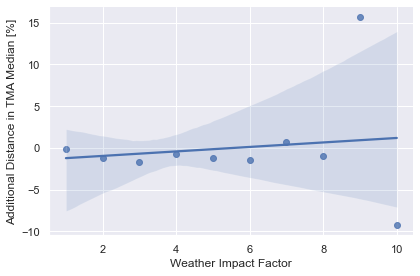

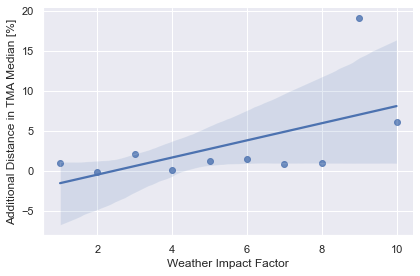

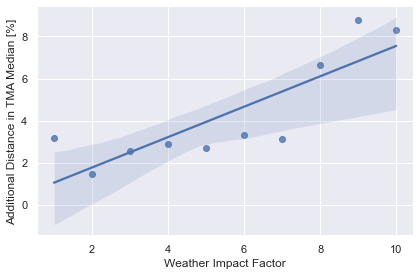

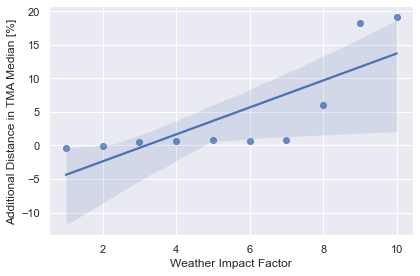

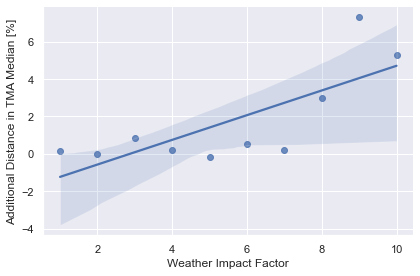

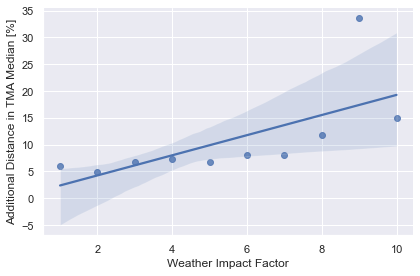

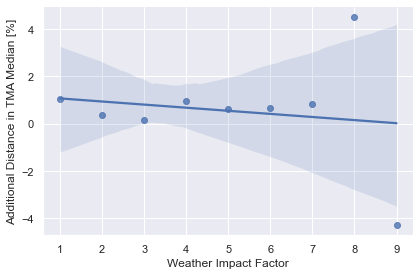

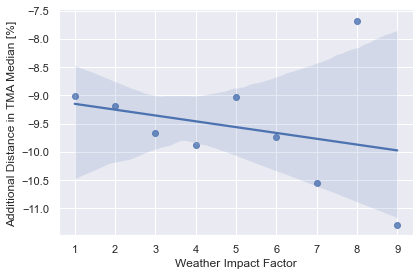

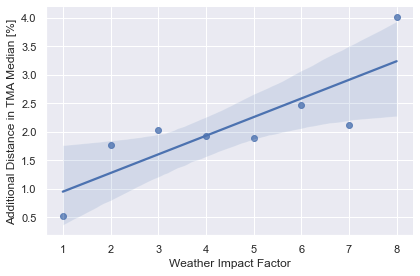

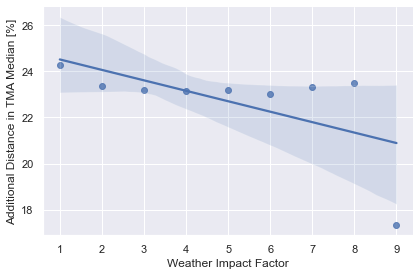

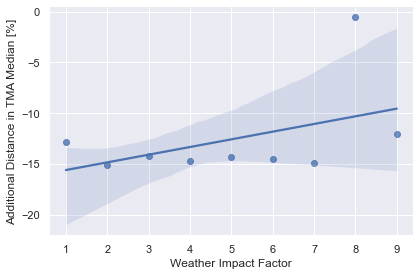

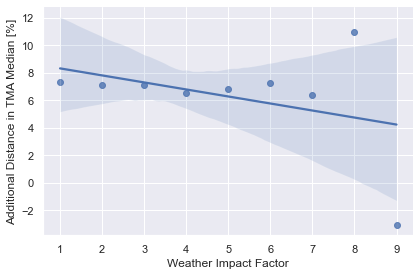

In [4]:
RUNWAYS = ['08', '01L', '01R', '26', '19R', '19L']
CLUSTERS = [1,2,3,4,5,6]

i = -1
for runway in RUNWAYS:
    i = i+1
    for cluster in CLUSTERS:
        df = rwy_metrics_WIF_horizontal_PIs_by_hour_df_list[i][cluster-1].copy()

        df.dropna(inplace=True)
        df = df[df['numberOfFlights']>0]
        #p1 = df["distanceChangePercentMean"].quantile(0.05)
        #p2 = df["distanceChangePercentMean"].quantile(0.95)
        #df = df.loc[(df['distanceChangePercentMean'] > p1) & (df['distanceChangePercentMean'] < p2) ]

        df.set_index(['WIF'], inplace=True)
        df.sort_index(inplace=True)

        median_df = pd.DataFrame(columns=['WIF', 'addDistanceMedian'])

        for idx, group in df.groupby(level='WIF'):
    
            #idx_df = group['distanceChangePercentMean']
            idx_df = group['additionalDistanceMean']

            idx_median = np.median(idx_df)
            
            median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)

        
        median_df['WIF'] = median_df['WIF'].astype(np.float)
        median_df['addDistanceMedian'] = median_df['addDistanceMedian'].astype(np.float)
        
        sns.set(rc={'figure.figsize':(1,1)})

        sns.lmplot(x='WIF',y='addDistanceMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
        plt.xlabel('Weather Impact Factor')
        #plt.ylabel('Additional Distance in TMA Median [NM]')
        plt.ylabel('Additional Distance in TMA Median [%]')
        
        fig_name = "AddDistanceVsWIF_runway" + runway + "_cluster" + str(cluster) + ".png"
        #plt.savefig(fig_name)
        
        #statsmodel:
        #median_df = median_df[median_df['WIF']<10]
        X_df = median_df[['WIF']]
        y_df = median_df[['addDistanceMedian']]
        
        X2 = sm.add_constant(X_df.values)
        est = sm.OLS(y_df, X2)
        est2 = est.fit()
        print(est2.summary()) 
        # with outliers - ESGG: 0.49 ESSA: 0.61
        # without outliers - ESGG: 0.18 ESSA: 0.18